# Gradient Boosting Machines (GBM)

This notebook demonstrates the main concepts of Gradient Boosting Machines (GBM) using the `scikit-learn` library. We will explore:
- The concept of boosting.
- How GBM works.
- Training a GBM model with a built-in dataset.

We will use the `breast_cancer` dataset for classification.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Step 1: Load and Explore the Dataset

We will use the `breast_cancer` dataset from `scikit-learn`, a binary classification dataset.

More about this dataset in the [original paper](https://minds.wisconsin.edu/bitstream/1793/59692/1/TR1131.pdf).

In [4]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

print(f"Feature names: {data.feature_names}")
print(f"Target names: {data.target_names}")
print(f"Shape of dataset: {X.shape}")

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of dataset: (569, 30)


In [17]:
temp = pd.DataFrame(X)
temp.columns = data.feature_names
temp.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
45,18.65,17.60,123.70,1076.0,0.1099,0.16860,0.19740,0.10090,0.1907,0.06049,...,22.82,21.32,150.60,1567.0,0.1679,0.5090,0.73450,0.23780,0.3799,0.09185
349,11.95,14.96,77.23,426.7,0.1158,0.12060,0.01171,0.01787,0.2459,0.06581,...,12.81,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
260,20.31,27.06,132.90,1288.0,0.1000,0.10880,0.15190,0.09333,0.1814,0.05572,...,24.33,39.16,162.30,1844.0,0.1522,0.2945,0.37880,0.16970,0.3151,0.07999
453,14.53,13.98,93.86,644.2,0.1099,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
563,20.92,25.09,143.00,1347.0,0.1099,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.65990,0.25420,0.2929,0.09873


## Step 2: Split the Data into Training and Testing Sets

We will split the dataset into 70% training and 30% testing data.

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 398
Testing samples: 171


## Step 3: Train a Gradient Boosting Machine (GBM) Model

We will use `GradientBoostingClassifier` from `scikit-learn`.

In [6]:
# Train a GBM model
gbm_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_clf.fit(X_train, y_train)

# Print training completion
print("GBM training completed.")

GBM training completed.


## Step 4: Evaluate the Model

We will calculate accuracy and display a confusion matrix.

Accuracy: 95.91%


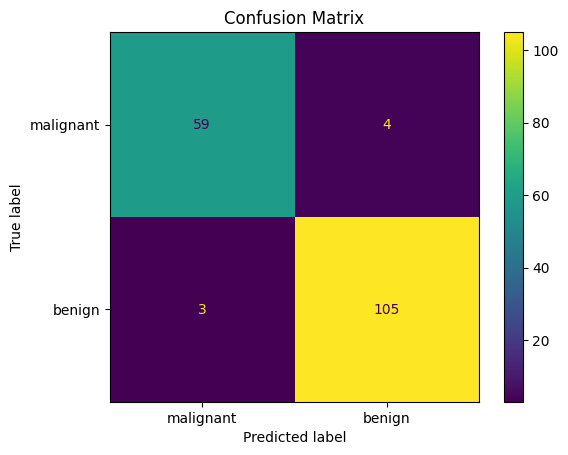

In [7]:
# Make predictions
y_pred = gbm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

## Step 5: Feature Importance

Gradient Boosting Machines provide feature importance scores, which indicate how much each feature contributes to the model's predictions.

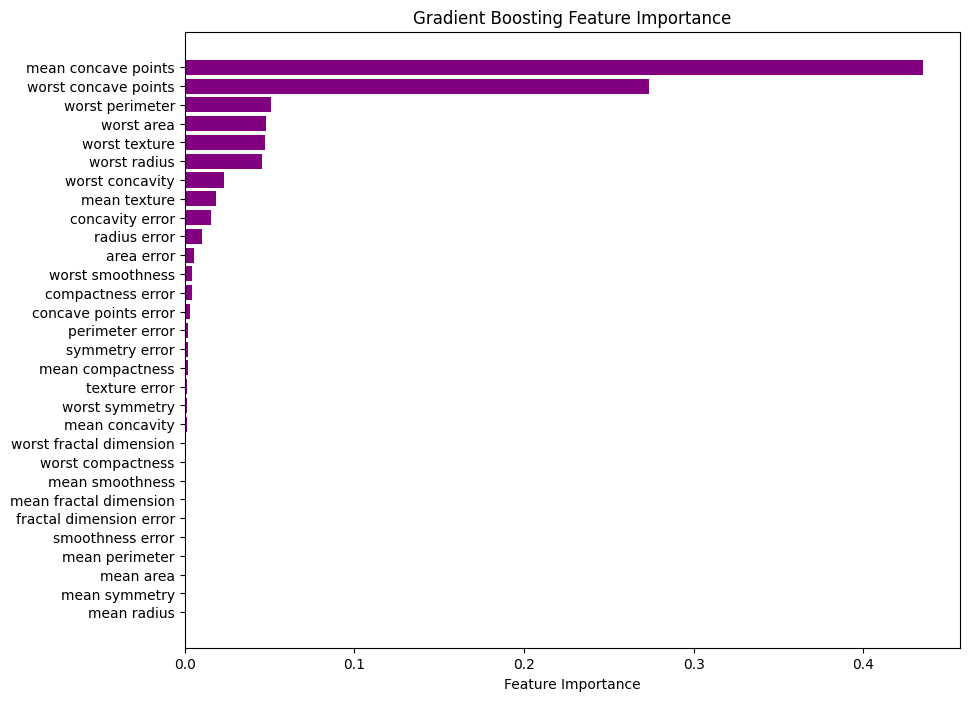

In [8]:
# Plot feature importance
feature_importance = gbm_clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 8))
plt.barh(data.feature_names[sorted_idx], feature_importance[sorted_idx], color='purple')
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

## Conclusion

This notebook demonstrated how to train and evaluate a Gradient Boosting Machine (GBM) model using the `scikit-learn` library. We explored how boosting works and visualized feature importance to understand the contributions of individual features.